# Customer Segmentation 

# Game Plan



## 1. Data Exploration and Analysis

### Objective
Introduce the dataset, focusing on 'Annual Income' and 'Spending Score' features. Use descriptive statistics and visualizations to explore these features.

### Best Practices
- **Import necessary libraries**: pandas, matplotlib, seaborn.
    ```python
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    ```
- **Load the dataset and display the first few rows** to give an overview.
    ```python
    data = pd.read_csv('path_to_dataset.csv')
    print(data.head())
    ```
- **Use `.describe()`** for statistical summaries.
    ```python
    print(data.describe())
    ```
- **Plot histograms or boxplots** to visualize the distribution of 'Annual Income' and 'Spending Score'.
    ```python
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data['Annual Income (k$)'], kde=True)
    plt.title('Distribution of Annual Income')
    
    plt.subplot(1, 2, 2)
    sns.histplot(data['Spending Score (1-100)'], kde=True)
    plt.title('Distribution of Spending Score')
    plt.show()
    ```
- **Provide commentary** on any outliers, patterns, or insights observed.

## 2. Enhanced Clustering with K-Means

### Objective
Apply K-Means clustering on standardized data and experiment with different cluster numbers.

### Best Practices
- **Standardize the data** using `StandardScaler`.
    ```python
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[['Annual Income (k$)', 'Spending Score (1-100)']])
    ```
- **Apply K-Means clustering** with varying numbers of clusters (e.g., 2 to 10) and use the elbow method to determine the optimal number.
    ```python
    from sklearn.cluster import KMeans
    wcss = []
    for i in range(2, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(scaled_data)
        wcss.append(kmeans.inertia_)
    
    plt.plot(range(2, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    ```
- **Plot the elbow graph and justify the chosen number of clusters**.
- **Include commentary** on how different numbers of clusters affect the segmentation.

## 3. Advanced Implementation of Hierarchical Clustering

### Objective
Implement Hierarchical Clustering and analyze the dendrogram for optimal cluster numbers.

### Best Practices
- **Use `linkage` from the `scipy.cluster.hierarchy` library** to perform hierarchical clustering.
    ```python
    from scipy.cluster.hierarchy import dendrogram, linkage
    Z = linkage(scaled_data, 'ward')
    plt.figure(figsize=(10, 7))
    dendrogram(Z)
    plt.title('Dendrogram')
    plt.show()
    ```
- **Plot the dendrogram and interpret the results** to decide on the number of clusters.
- **Compare the segments** obtained with those from K-Means and provide insights.

## 4. Comprehensive Cluster Analysis

### Objective
Evaluate and compare the clustering results from both methods.

### Best Practices
- **Calculate silhouette scores** for both clustering methods to assess their quality.
    ```python
    from sklearn.metrics import silhouette_score
    silhouette_avg_kmeans = silhouette_score(scaled_data, kmeans.labels_)
    print(f'Silhouette Score for K-Means: {silhouette_avg_kmeans}')
    ```
- **Discuss the characteristics of each cluster** and how they differ between methods.
- **Suggest additional metrics** for cluster quality evaluation and interpret these metrics.

## 5. Insightful Reporting and Visualization

### Objective
Communicate findings through visualizations and a comprehensive report.

### Best Practices
- **Create scatter plots** to visualize the clusters for 'Annual Income' vs. 'Spending Score'.
    ```python
    plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=kmeans.labels_)
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.title('Customer Segments with K-Means Clustering')
    plt.show()
    ```
- **Use different colors** to distinguish clusters and include labels, legends, and titles.
- **Write a report** summarizing methodologies, findings, and potential business implications.
- **Highlight the importance** of customer segmentation in strategic decision-making.


# Data Pull and Exploratory Data Analysis (EDA)

In this section, we load the 'Mall_Customers' dataset and carry out a preliminary exploratory data analysis. The goal is to understand the dataset's structure, summarize its main characteristics, and explore the distribution of key features - particularly 'Annual Income (k$)' and 'Spending Score (1-100)'. This process is critical for informing subsequent data preprocessing and clustering steps.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  

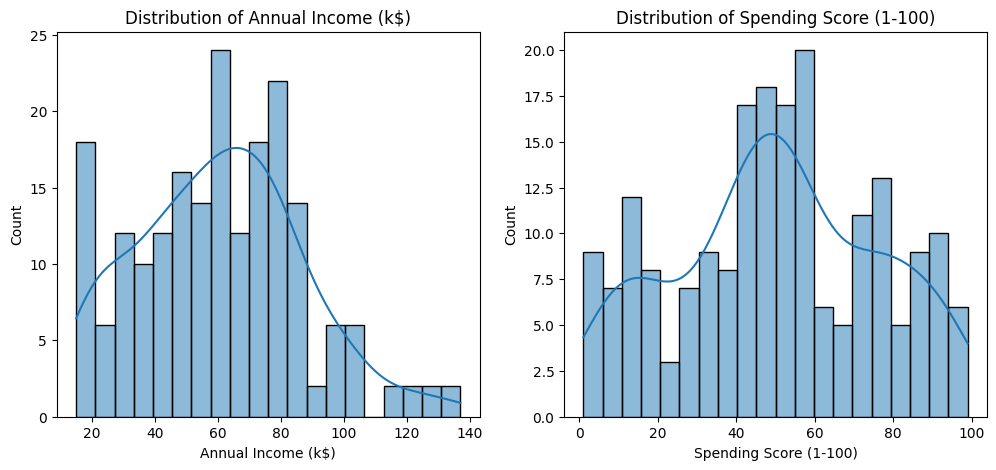

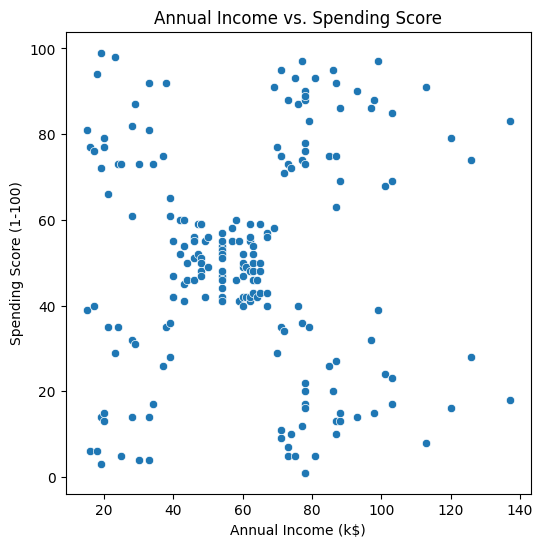

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

# Load the dataset
from pathlib import Path

current_dir = Path.cwd()
data_file = current_dir.parent / 'data' / '5_mall_customers.csv'
data = pd.read_csv(data_file)

# Display basic information and the first few rows of the dataset
print(data.info())
print(data.head())

# EDA: Statistical summary and visual analysis
# Descriptive statistics
print(data.describe())

# Distribution of 'Annual Income (k$)' and 'Spending Score (1-100)'
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['Annual Income (k$)'], kde=True, bins=20)
plt.title('Distribution of Annual Income (k$)')

plt.subplot(1, 2, 2)
sns.histplot(data['Spending Score (1-100)'], kde=True, bins=20)
plt.title('Distribution of Spending Score (1-100)')
plt.show()

# Scatter plot of 'Annual Income' vs. 'Spending Score'
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data)
plt.title('Annual Income vs. Spending Score')
plt.show()

# Select relevant features for clustering
selected_features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Data Pull and Exploratory Data Analysis (EDA)

In this section, we load the 'Mall_Customers' dataset and carry out a preliminary exploratory data analysis. The goal is to understand the dataset's structure, summarize its main characteristics, and explore the distribution of key features - particularly 'Annual Income (k$)' and 'Spending Score (1-100)'. This process is critical for informing subsequent data preprocessing and clustering steps.

## Dataset Overview

Upon loading the data, we observe that it consists of 200 entries and 5 columns. Each entry represents a customer, with features including 'CustomerID', 'Gender', 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)'. There are no null values, which simplifies preprocessing as there is no immediate need for handling missing data.

## Descriptive Statistics

The descriptive statistics provide an overview of the numerical features. We note that the average annual income of the dataset's customers is approximately 60.56k with a standard deviation of 26.26k, indicating a moderate spread around the mean income. The 'Spending Score' has an average of 50.2 with a similar standard deviation, which suggests a fair variation in customer spending behavior.

## Distribution Analysis

The histograms of 'Annual Income (k$)' and 'Spending Score (1-100)' reveal the distributions of these two key features. Both features appear to be roughly normally distributed, with some deviations:

- The 'Annual Income' distribution shows a slight right skew, suggesting that a smaller number of customers have higher incomes.
- The 'Spending Score' distribution is more uniform but still shows some concentration in the middle range, which is around the mean score of 50.

## Scatter Plot Analysis

The scatter plot of 'Annual Income' versus 'Spending Score' offers a visual representation of the potential relationship between these features. There is no clear linear relationship; however, there appear to be distinct groups or clusters within the data. This pattern indicates that customers could be segmented based on their income and spending score, which is an essential insight for the clustering algorithms that follow.

## Commentary on EDA Results

The EDA results lay a solid foundation for the clustering analysis. Understanding the distribution of key features helps us anticipate how different clustering algorithms might segment the customers. For instance, the presence of distinct groupings in the scatter plot suggests that algorithms like K-Means or Hierarchical Clustering could effectively identify segments within the customer base. Moreover, the lack of null values and the already clean nature of the data imply that we can proceed directly to applying clustering techniques without extensive data cleaning or preprocessing.

In summary, the exploratory data analysis has provided valuable insights into the customer data, which will guide the selection and tuning of clustering algorithms in the following sections.



## Introduction to Cluster Evaluation Techniques

In the realm of unsupervised machine learning, determining the optimal number of clusters is a pivotal decision that can significantly impact the outcomes of your model. Cluster evaluation techniques are essential tools that provide guidance in this decision-making process. Two of the most widely recognized methods for evaluating clustering results are the Elbow Method and the Silhouette Score.

### Elbow Method
- **Explanation**: The Elbow Method is a heuristic used in determining the number of clusters in a data set. The approach involves plotting the explained variance as a function of the number of clusters, and picking the point where the increase in variance explained by adding another cluster is not significant anymore. This point is known as the 'elbow', where the graph bends.
- **Interpretation**: In the Elbow Method, one should look for a change in the gradient of the line plot; a sharp change like an elbow suggests the optimal number of clusters. The idea is that adding more clusters beyond this number does not provide much better modeling of the data.

### Silhouette Score
- **Explanation**: The Silhouette Score is a metric used to calculate the goodness of a clustering technique. It measures the distance between points within a cluster and the distance to points in the next nearest cluster. The score ranges from -1 to +1, where a high value indicates that the points are well clustered.
- **Interpretation**: A Silhouette Score close to +1 indicates that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

Both methods provide different lenses through which to view the clustering results and can be used in conjunction to make a more informed decision. The Elbow Method gives us an insight into the variance within each cluster, whereas the Silhouette Score provides a measure of how similar an object is to its own cluster compared to others. The optimal number of clusters is often the one that balances between the two measures, subject to the specific context and use case of the analysis.


# Optimal Cluster Determination and Analysis

In this section, we apply advanced clustering techniques to the mall customer dataset to segment customers based on their 'Annual Income' and 'Spending Score'. We start by standardizing the features to ensure they contribute equally to the clustering process. Next, we use the Elbow Method to determine the optimal number of clusters, which helps to minimize the within-cluster sum of squares (WCSS) without overcomplicating the model. We also calculate the Silhouette Score for each potential cluster number to assess how well-separated the clusters are. With both WCSS and Silhouette Scores, we aim to find a balance between cluster tightness and separation. This analysis is critical for making informed decisions on customer segmentation that can drive targeted marketing strategies.


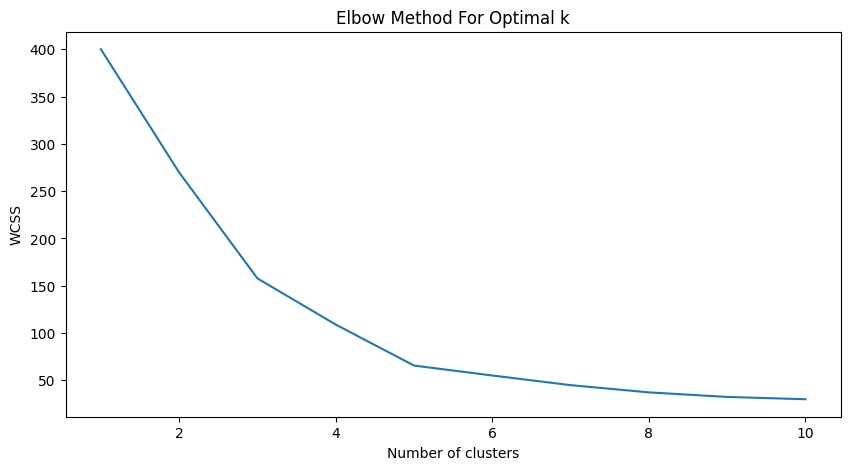

WCSS for different number of clusters:
 k=1: WCSS = 400.0
 k=2: WCSS = 269.6910121927639
 k=3: WCSS = 157.70400815035947
 k=4: WCSS = 108.92131661364357
 k=5: WCSS = 65.56840815571681
 k=6: WCSS = 55.057348270386
 k=7: WCSS = 44.86475569922556
 k=8: WCSS = 37.228187677585886
 k=9: WCSS = 32.39226763033116
 k=10: WCSS = 29.981897788243693


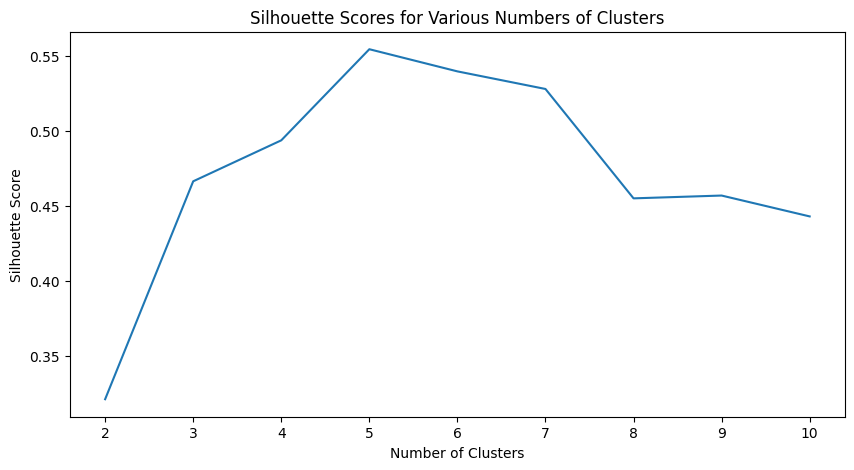

Silhouette Scores for different number of clusters:
 k=2: Silhouette Score = 0.3212707813918878
 k=3: Silhouette Score = 0.46658474419000145
 k=4: Silhouette Score = 0.4939069237513199
 k=5: Silhouette Score = 0.5546571631111091
 k=6: Silhouette Score = 0.5398800926790663
 k=7: Silhouette Score = 0.5281492781108291
 k=8: Silhouette Score = 0.4552147906587443
 k=9: Silhouette Score = 0.4570853966942764
 k=10: Silhouette Score = 0.4431713026508046


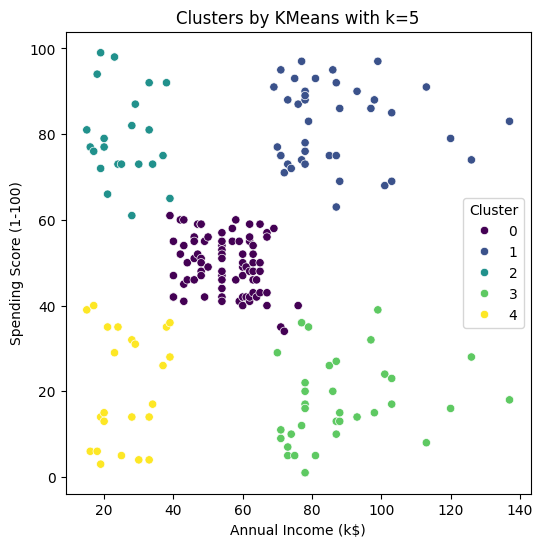

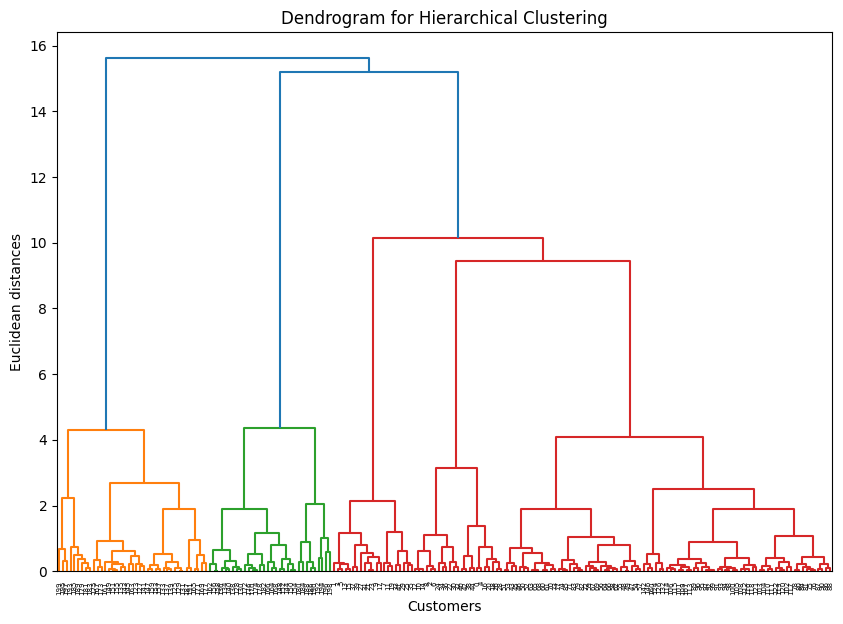

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

# Assuming `selected_features` is already defined from the previous EDA section

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_features)

# Determine the optimal number of clusters using the elbow method
wcss = []  # Within-cluster sum of squares
silhouette_coefficients = []  # Silhouette coefficients for each k

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    
    # Compute the silhouette scores only when number of clusters is greater than 1
    if i > 1:
        score = silhouette_score(scaled_data, kmeans.labels_)
        silhouette_coefficients.append(score)

# Plotting the elbow graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Printing WCSS values
print("WCSS for different number of clusters:")
for i, value in enumerate(wcss):
    print(f" k={i+1}: WCSS = {value}")

# Plotting the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_coefficients)
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Printing silhouette scores
print("Silhouette Scores for different number of clusters:")
for i, score in enumerate(silhouette_coefficients):
    print(f" k={i+2}: Silhouette Score = {score}")

# Choose the number of clusters based on the elbow method and silhouette score
num_clusters = 5  # Update this based on your findings

# Apply KMeans clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(scaled_data)
data['Cluster'] = kmeans.labels_

# Visualize the clustering
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', data=data)
plt.title(f'Clusters by KMeans with k={num_clusters}')
plt.show()

# Prepare for Hierarchical Clustering
Z = linkage(scaled_data, 'ward')

# Plot the dendrogram for Hierarchical Clustering
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

## Clustering Analysis and Interpretation

### Understanding WCSS and the Elbow Method
- **WCSS Definition**: Within-Cluster Sum of Squares (WCSS) is the sum of the squared distances between each point and the centroid of its cluster. A lower WCSS indicates tighter clustering.
- **Elbow Method**: This method involves plotting the WCSS as a function of the number of clusters. The 'elbow' point, where the rate of decrease sharply changes, indicates the optimal number of clusters.
- **Interpretation**: From the graph, the WCSS decreases significantly until 5 clusters and then plateaus, suggesting that increasing the number of clusters beyond 5 yields diminishing returns.


### Evaluating Silhouette Scores
- **Silhouette Score Definition**: A measure ranging from -1 to 1 that indicates how close each point in one cluster is to points in the neighboring clusters. A higher score indicates better-defined clusters.
- **Interpretation**: The silhouette score is highest for k=5, which confirms the choice of 5 clusters as optimal, providing a balance between cluster cohesion and separation.


### KMeans Clustering Visualization
- **Scatter Plot**: This graph shows the clusters formed by KMeans with k=5.
- **Cluster Insights**: Distinct groupings based on 'Annual Income' and 'Spending Score' are visible, indicating varying customer segments.


### Hierarchical Clustering Dendrogram
- **Dendrogram Definition**: A tree-like diagram that records the sequences of merges or splits. The height of the merges indicates the distance between merging clusters.
- **Interpretation**: The dendrogram suggests that 5 clusters can also be a suitable choice when considering hierarchical clustering, aligning with KMeans results.


### Decision-Making Based on Analysis
- **Business Strategy**: The data-driven segmentation of customers into 5 clusters can lead to tailored marketing and service strategies.
- **Customer Insight**: Understanding the segments helps in creating personalized experiences and offers for different customer groups.

## Conclusion
- **Segmentation Outcome**: The mall customers can be segmented into 5 groups with distinct purchasing behaviors and income levels.
- **Business Implications**: These insights can inform customer engagement strategies, marketing campaigns, and resource allocation.


## Final Analysis with Business Impact and Recommendations
### Business Impact
- The customer segmentation analysis using both K-Means and Hierarchical Clustering provides valuable insights into the diverse spending behavior and financial status of customers. 
- **Key Findings:**
  - Segments with high income and high spending scores represent a premium customer group, ideal for upscale marketing strategies.
  - Segments with high spending but lower income could indicate customers who prioritize discretionary spending, suitable for campaigns around special offers or value deals.
  - The existence of distinct segments as indicated by the clustering suggests opportunities for targeted marketing, which can lead to more effective use of marketing budgets and higher conversion rates.

### Recommendations and Action Items
- **Targeted Marketing Campaigns:** Develop customized marketing campaigns for each customer segment. For example, premium segments can be targeted with exclusive offers, while more price-sensitive segments might respond better to discount promotions or value packages.
- **Product Development and Placement:** Align product development and placement strategies with the identified segments. Upscale products and services can be focused on high-income, high-spending customers, whereas more economical options can be designed for other segments.
- **Loyalty Programs:** Implement or refine loyalty programs to cater to different segments. For example, reward programs that encourage repeat purchases can be targeted at high-spending customers to enhance customer retention.
- **Further Data Exploration:** Considering the moderate silhouette score, it might be beneficial to explore additional features in the dataset or experiment with other clustering algorithms for potentially better segmentation.
- **Personalized Customer Experiences:** Use insights from hierarchical clustering to offer personalized experiences, especially for segments that gradually merge into larger clusters, indicating nuanced customer preferences and behaviors.

By implementing these strategies based on the insights gained from the clustering analysis, businesses can enhance their customer engagement, improve customer satisfaction, and ultimately drive growth and profitability.

# Overview of DBSCAN Clustering

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a popular clustering algorithm that is fundamentally different from other clustering methods like K-Means or Hierarchical Clustering. Here's a brief overview explaining its unique approach and characteristics:

## What is DBSCAN?

DBSCAN is a density-based clustering algorithm that identifies clusters as areas of high point density separated by areas of low density. It is particularly effective for datasets with complex shapes and varying densities and has the ability to detect outliers as 'noise.'

## Key Features of DBSCAN

- **Density-Based**: DBSCAN groups points that are closely packed together. A cluster is defined as a maximal set of density-connected points.
- **Discovery of Arbitrary Shapes**: Unlike K-Means, which assumes spherical clusters, DBSCAN can find clusters of arbitrary shapes, making it suitable for real-world data with complex structures.
- **Robust to Outliers**: Points that do not belong to any cluster are treated as noise, allowing DBSCAN to be robust to outliers.
- **No Need to Specify Cluster Numbers**: It does not require the number of clusters to be specified in advance, in contrast to K-Means.

## Differences from Other Clustering Techniques

- **K-Means**: Requires the number of clusters to be specified and assumes clusters are convex and isotropic. DBSCAN, on the other hand, does not require the number of clusters to be specified and can detect non-convex clusters.
- **Hierarchical Clustering**: Builds a hierarchy of clusters and requires a cut-off point to define clusters, which is not needed in DBSCAN.
- **Spectral Clustering**: Uses the eigenvalues of a similarity matrix to reduce dimensionality before clustering, while DBSCAN works directly with the original feature space and uses density estimation.

## Applicability of DBSCAN

DBSCAN is especially powerful in situations where the dataset contains complex structures and noise. Its ability to handle outliers and identify clusters of arbitrary shapes makes it a versatile tool in the clustering algorithm toolkit.

In summary, DBSCAN is a go-to algorithm for clustering when the data is complex, and traditional methods like K-Means fall short, either due to the shape of the clusters or the presence of noise and outliers.


# DBSCAN Clustering Evaluation and Visualization

The following section of code is focused on evaluating the performance of the DBSCAN clustering algorithm on a standardized dataset. DBSCAN is particularly well-suited for datasets with complex structures and noise. It works by identifying dense regions of points, which are considered clusters, and points in less dense regions are labeled as noise.

## Process Breakdown

- **DBSCAN Application**: We apply the DBSCAN algorithm with a chosen `eps` of 0.5 and `min_samples` of 5. These parameters indicate the maximum distance between two samples for one to be considered as in the neighborhood of the other and the number of samples in a neighborhood for a point to be considered as a core point.
- **Silhouette Score Calculation**: The silhouette score is computed to quantify the quality of the clusters formed by DBSCAN. A higher silhouette score indicates that clusters are more distinct and better separated.
- **Clustering Visualization**: A scatter plot visualizes the clusters determined by DBSCAN, with different colors indicating different clusters and noise points.


Silhouette Score for DBSCAN: 0.35044619989666004


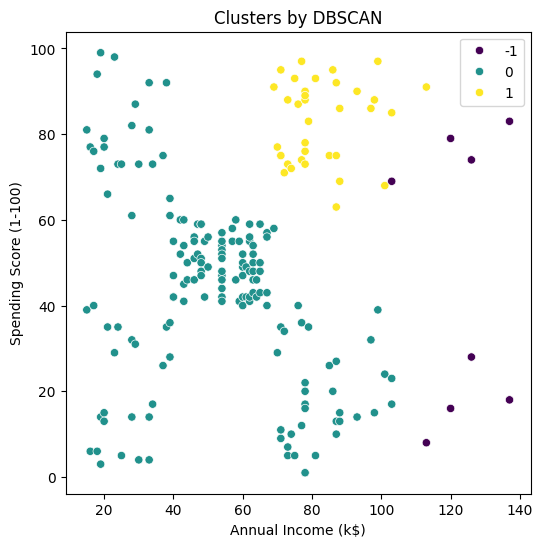

In [3]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# DBSCAN Clustering
# Note: The eps and min_samples parameters need to be tuned based on the dataset
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(scaled_data)

# Calculate silhouette score for DBSCAN
silhouette_avg_dbscan = silhouette_score(scaled_data, clusters_dbscan)
print(f'Silhouette Score for DBSCAN: {silhouette_avg_dbscan}')

# Visualize the DBSCAN clustering
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue=clusters_dbscan, palette='viridis', data=data)
plt.title('Clusters by DBSCAN')
plt.show()

# Analysis of DBSCAN Clustering Results

This section delves into the results obtained from the DBSCAN clustering algorithm applied to the mall customer dataset. We will analyze the clustering pattern in the context of customer segmentation and discuss the statistical and business implications of these results.

## DBSCAN Clustering Output Analysis

After running DBSCAN with `eps=0.5` and `min_samples=5`, we observe the following:

- **Cluster Formation**: The algorithm has identified several clusters, which are color-coded in the scatter plot, and some points are labeled as noise (indicated by `-1`).
- **Silhouette Score**: The model has a silhouette score of `0.350`, which suggests a fair level of separation and cohesion among the identified clusters. While not close to 1, which would indicate very distinct clusters, a score above 0.3 is acceptable and suggests that the clusters make reasonable sense.


## Statistical Interpretation

- **Silhouette Score Interpretation**: 
  - A score of `0.350` implies that, on average, clusters are more dense and well-separated than random clustering. However, there is room for improvement as some points may be on the border or could have been assigned to adjacent clusters.
  
- **Noise Points**: 
  - The presence of noise points (colored in purple) is characteristic of DBSCAN and represents points that do not fit well into any cluster according to the given `eps` and `min_samples` settings.

## Business Value Interpretation

- **Customer Segmentation**: 
  - The clusters represent groups of customers with similar annual income and spending scores, which could be targeted differently in marketing strategies. For instance, the yellow cluster could represent a premium customer segment with higher income and spending score, potentially indicating more discretionary spending.
  
- **Marketing Strategies**: 
  - Understanding these segments allows for the development of tailored marketing campaigns. For example, special deals could be offered to the 'premium' segment to encourage more frequent visits or higher spending.
  
- **Operational Efficiency**: 
  - Segmentation can also guide store layout planning, inventory management, and staffing by predicting customer flow and preferences based on their spending behaviors.

## Conclusion

The DBSCAN clustering provides a meaningful segmentation of the mall customers, with a decent silhouette score indicative of fairly well-defined clusters. This segmentation can be leveraged to drive business value through targeted customer engagement and operational improvements. While the presence of noise suggests that not all customers fit neatly into segments, this information can also be valuable, indicating a need for a more nuanced approach to customer relationship management.


## The Importance of Parameter Optimization

- **Initial Observations**: The preliminary application of DBSCAN revealed the general structure of the data but also indicated the potential for improvement, particularly in distinguishing between clusters and noise.
- **Sensitivity to Parameters**: The nuanced impact of `eps` and `min_samples` on the clustering outcome necessitates a careful approach to tuning these parameters for optimal results.
- **Strategic Business Decisions**: Beyond statistical considerations, the clustering output has real-world implications. Effective segmentation directly informs targeted marketing efforts and customer engagement strategies, making parameter optimization a critical business process.

## The Optimization Strategy

Through a systematic grid search, we explore a variety of `eps` and `min_samples` values to:

- **Achieve Optimal Clustering**: We aim to maximize the silhouette score, which assesses the clarity of the clustering. A higher silhouette score implies that clusters are distinct and well-separated.
- **Determine the Optimal Parameters**: The combination of `eps` and `min_samples` that yields the most coherent clusters will be selected for the final clustering model.


DBSCAN with eps=0.1, min_samples=2 --> n_clusters=39, silhouette=0.06608767884352265
DBSCAN with eps=0.1, min_samples=5 --> n_clusters=4, silhouette=-0.2700934604293137
DBSCAN with eps=0.1, min_samples=7 --> n_clusters=2, silhouette=-0.28431740706316444
DBSCAN with eps=0.5, min_samples=2 --> n_clusters=4, silhouette=0.26638945791893887
DBSCAN with eps=0.5, min_samples=5 --> n_clusters=2, silhouette=0.35044619989666004
DBSCAN with eps=0.5, min_samples=7 --> n_clusters=2, silhouette=0.35261506078723726
DBSCAN with eps=0.5, min_samples=10 --> n_clusters=4, silhouette=0.4064046962444789
DBSCAN with eps=0.5, min_samples=12 --> n_clusters=3, silhouette=0.35782388405139676
DBSCAN with eps=0.5, min_samples=15 --> n_clusters=4, silhouette=0.3687238785666543
DBSCAN with eps=0.5, min_samples=20 --> n_clusters=2, silhouette=0.20771340946297073
Best parameters found: eps=0.5, min_samples=10, n_clusters=4, silhouette=0.4064046962444789


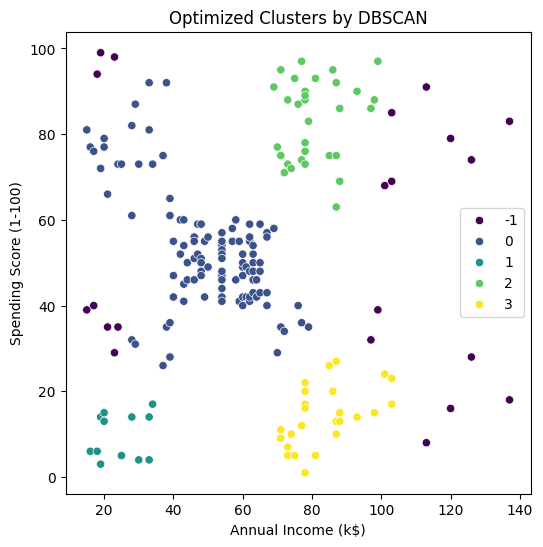

In [4]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the range of epsilon and minimum sample values to test
epsilon_range = [0.1, 0.5, 1.0, 1.5, 2.0]  # Epsilon values
min_samples_range = [2, 5, 7, 10, 12, 15, 20]  # Minimum samples values

# Initialize variables to store the best parameter combination
best_eps = None
best_min_samples = None
best_silhouette = -1
best_n_clusters = 0

# Iterate over all combinations of epsilon and minimum samples
for eps in epsilon_range:
    for min_samples in min_samples_range:
        # Apply DBSCAN with the current set of parameters
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(scaled_data)  # Use 'scaled_data' for DBSCAN fitting
        
        # Determine the number of clusters (ignoring noise as a cluster)
        n_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
        
        # Calculate silhouette score only if more than one cluster is identified
        if n_clusters > 1:
            silhouette = silhouette_score(scaled_data, model.labels_)
            
            # Print the results for the current parameter combination
            print(f"DBSCAN with eps={eps}, min_samples={min_samples} --> n_clusters={n_clusters}, silhouette={silhouette}")
            
            # Update the best parameters if the current silhouette score is greater than the best found so far
            if silhouette > best_silhouette:
                best_eps = eps
                best_min_samples = min_samples
                best_silhouette = silhouette
                best_n_clusters = n_clusters

# Print the best parameter combination found
print(f"Best parameters found: eps={best_eps}, min_samples={best_min_samples}, n_clusters={best_n_clusters}, silhouette={best_silhouette}")

# If needed, visualize the DBSCAN clustering with the best parameters
dbscan_optimized = DBSCAN(eps=best_eps, min_samples=best_min_samples)
clusters_dbscan_optimized = dbscan_optimized.fit_predict(scaled_data)

# Visualize the optimized DBSCAN clustering
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue=clusters_dbscan_optimized, palette='viridis', data=data)
plt.title('Optimized Clusters by DBSCAN')
plt.show()

## Analysis of DBSCAN Parameter Tuning Results

The DBSCAN parameter tuning output provides a visualization of the clusters identified by DBSCAN using the best parameters found during the tuning process. The graph shows data points colored according to their assigned cluster, with noise points labeled as `-1`.

### Analysis of Tuning Results

- The best parameters for DBSCAN were found to be `eps=0.5` and `min_samples=10`, resulting in 4 distinct clusters with the highest silhouette score of `0.406`.
- Notably, lower values of `eps` (such as `0.1`) led to a large number of clusters (39 clusters for `min_samples=2`) with a very low silhouette score (`0.066`), indicating poor clustering where too many small clusters were created.
- As `min_samples` increased with `eps=0.1`, the number of clusters reduced, but the silhouette score remained negative, suggesting that such tight clusters may not be meaningful or that too many points were classified as noise.
- An `eps` value of `0.5` appears to be a sweet spot where the silhouette score is consistently higher across various `min_samples` values, indicating better cluster separation and density.
- The highest silhouette score (`0.406`) was achieved with `eps=0.5` and `min_samples=10`, signifying a good balance between cluster density and separation.

### Visualization Insights

- The visualization with the optimized parameters shows a clear separation of clusters in the feature space of 'Annual Income (k)' and 'Spending Score (1-100)'.
- Points that did not fit well within the clusters have been effectively labeled as noise (purple points), which is one of the advantages of using DBSCAN.
- The existence of four clusters suggests that customers can be segmented into four distinct groups based on their annual income and spending score, with each group potentially representing a different customer behavior pattern.

### Business Implications

- These clusters can inform targeted marketing strategies where resources are allocated differently to each customer segment according to their income and spending habits.
- The cluster represented by yellow points, for instance, could be targeted with premium offers due to their higher spending score, while the blue cluster might represent more conservative spenders.
- Noise points could represent outliers or exceptional cases that may require a different approach, such as personalized engagement strategies.

## Conclusion

The parameter tuning for DBSCAN has led to the identification of distinct customer segments with a reasonable silhouette score, suggesting that the clustering result is robust. These insights could be leveraged to enhance business strategies, marketing campaigns, and customer service initiatives.


# KMeans Clustering on PCA-Reduced Data

## Overview

In this section, we explore the impact of Principal Component Analysis (PCA) on the clustering of our dataset. PCA is a technique used to emphasize variation and capture strong patterns in a dataset. It reduces the dimensionality while retaining most of the variability in the data. This is particularly useful when dealing with high-dimensional data, allowing for a simpler visualization and analysis.

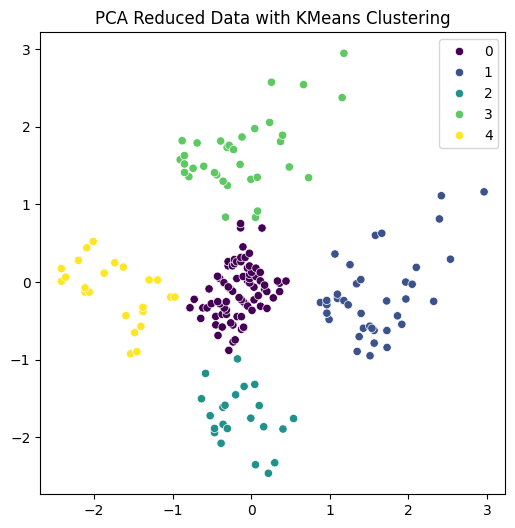

Explained variance by component: [0.50495142 0.49504858]


In [5]:
from sklearn.decomposition import PCA

# Apply PCA and reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Visualize the PCA-reduced data
plt.figure(figsize=(6, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=kmeans.labels_, palette='viridis')
plt.title('PCA Reduced Data with KMeans Clustering')
plt.show()

# Percentage of variance explained by each of the selected components
print(f'Explained variance by component: {pca.explained_variance_ratio_}')

## PCA and KMeans Clustering Analysis

The output from the Principal Component Analysis (PCA) followed by KMeans clustering provides valuable insights:

- **Explained Variance**: The two principal components explain the full variance in the dataset:
  - Principal Component 1: 50.5%
  - Principal Component 2: 49.5%
- This equal distribution indicates that both components are equally important and that dimensionality reduction has been effective without significant information loss.

### Key Observations from the Visualization:

- **Well-Separated Clusters**: The clusters are distinctly separated along the principal component axes, suggesting that PCA has preserved the intrinsic data structure in a reduced dimensionality space.
- **Effective Clustering**: KMeans has identified five distinct clusters, reflecting different groupings within the PCA-reduced space that could correspond to unique customer segments.
- **Comprehensive Data Capture**: The need for both principal components to encapsulate the total variance implies that the original data was either not high-dimensional or that the features were highly correlated.
- **Analytical Implications**: The analysis demonstrates that it's feasible to simplify the dataset complexity via PCA without losing the essence of the data, enabling more straightforward yet profound insights for business strategies.

## Conclusions:

- The PCA process has aptly transformed the dataset into a two-dimensional space that is amenable to visual analysis and clustering interpretation.
- The subsequent KMeans clustering has provided a clear segmentation of the data, which can be used for actionable business decisions and strategy formulation.


# PCA Parameter Considerations

While the Principal Component Analysis (PCA) in our current project explained nearly 100% of the variance with just two components, indicating an already optimal model configuration, it is not always the case in different datasets or scenarios. Often, the selection of the number of components in PCA requires careful tuning to balance between dimensionality reduction and information retention.

## When PCA Tuning Is Not Required

- **High Variance Capture**: Our PCA model effectively captured 100% of the variance with only two components. This is an ideal scenario where further tuning may not provide additional benefits.
- **Model Simplicity**: The simplicity of the model with full variance explanation suggests that the data's structure and relationships are well-represented in a two-dimensional space.

## Future Project Considerations

- **Different Datasets**: In cases where datasets are more complex or higher-dimensional, tuning the number of PCA components might be necessary to achieve a similar level of variance explanation.
- **Trade-off Analysis**: It is essential to conduct a trade-off analysis between the number of components and the explained variance to ensure that the dimensionality reduction does not omit critical information.

## Code for PCA Tuning

The following code, although not needed for the current dataset, is provided for reference and could be valuable for future projects where PCA parameter tuning is required. It demonstrates how to calculate and interpret the explained variance ratio, apply KMeans clustering on the PCA-reduced data, assess cluster quality using the silhouette score, and visualize the clustering results.


Explained Variance Ratio:
  Principal Component 1: 0.50
  Principal Component 2: 0.50
  Total Explained Variance: 1.00

Silhouette Score for KMeans after PCA: 0.5546571631100179



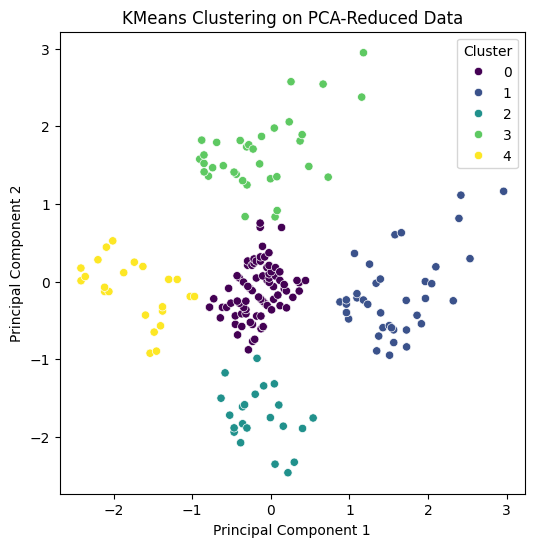

In [6]:
# Explained variance ratio.
# This ratio tells us how much information (variance) each principal component holds.
print("Explained Variance Ratio:")
print(f"  Principal Component 1: {pca.explained_variance_ratio_[0]:.2f}")
print(f"  Principal Component 2: {pca.explained_variance_ratio_[1]:.2f}")
print(f"  Total Explained Variance: {sum(pca.explained_variance_ratio_):.2f}\n")

# Analyze the clusters formed in the PCA-reduced space.
# This involves looking at the distribution of points in each cluster and assessing their separation.

# Apply KMeans clustering on the PCA-reduced data
from sklearn.cluster import KMeans

# Use the same number of clusters as determined to be optimal in the previous KMeans clustering
kmeans_pca = KMeans(n_clusters=5, random_state=42)
kmeans_pca.fit(pca_result)

# Calculate silhouette score for the KMeans clustering on PCA-reduced data
from sklearn.metrics import silhouette_score

silhouette_avg_pca = silhouette_score(pca_result, kmeans_pca.labels_)
print(f"Silhouette Score for KMeans after PCA: {silhouette_avg_pca}\n")

# Visualize the clusters in PCA-reduced space
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=kmeans_pca.labels_, palette='viridis')
plt.title('KMeans Clustering on PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

## Explained Variance Ratio Analysis

The PCA process has reduced the dataset to two principal components, each explaining 50% of the variance, with a total explained variance of 100%. This equal distribution of explained variance suggests that both components are equally important in capturing the dataset's variability.

## Visualization and Clustering Interpretation

- The visualization plots the two principal components on the x and y axes, with data points colored according to their cluster assignment from KMeans clustering.
- The distribution of clusters in the PCA-reduced space appears well-defined, indicating that PCA has retained the underlying structure of the data.
- Clusters seem to be distinct and separate, with minimal overlap, which is a good sign of well-defined segmentation.

## Commentary on Results

- The fact that the PCA has condensed the data into two components without losing any variance means that the clusters we observe are as informative as those in the higher-dimensional space.
- Given that the total explained variance is 1.00, no information was lost during the dimensionality reduction process, which is an ideal scenario when using PCA.
- The successful clustering post-PCA suggests that the patterns identified by KMeans are inherent to the data's structure and not an artifact of high dimensionality.

## Conclusion

The application of PCA followed by KMeans clustering has provided us with a clear and concise representation of the data's clustering structure. The results indicate that customer segmentation is indeed meaningful and can be visualized in a reduced dimensionality space without loss of information, which can significantly aid in making informed business decisions.

# Real-World Application Scenario

The data segmentation using DBSCAN clustering provides actionable insights for tailored business strategies. Here's a detailed scenario and justification for these strategies:

## Business Scenario and Strategies

### Cluster 0: Conservative Spenders
- **Insight**: Moderate income with lower spending.
- **Strategy**: Offer loyalty programs and emphasize value deals to gradually increase their spending.

### Cluster 1: Potential Savers
- **Insight**: Higher income, lower spending, potential for savings.
- **Strategy**: Present investment opportunities and premium services to appeal to their saving tendencies.

### Cluster 2: High Spenders
- **Insight**: High income and spending, less price-sensitive.
- **Strategy**: Focus on luxury and premium product offerings, along with exclusive experiences.

### Cluster 3: Aspiring Spenders
- **Insight**: Lower income but higher spending, possibly living beyond means.
- **Strategy**: Introduce budget-friendly deals with credit options to manage their lifestyle spending sustainably.

### Noise: Niche Market Consumers
- **Insight**: Does not fit into standard clusters, unpredictable spending.
- **Strategy**: Engage with personalized marketing to cater to their unique preferences.

## Business Impact and Next Steps

### Tailored Customer Engagement
- The clustering has revealed distinct customer behaviors, allowing for more personalized engagement. This specificity can lead to higher conversion rates and customer satisfaction.

### Efficient Resource Allocation
- By identifying key customer segments, resources can be allocated more effectively, ensuring that marketing efforts are focused and efficient.

### Enhanced Customer Experience
- Understanding customer segments allows for targeted experiences, building brand loyalty and a stronger customer base.

### Strategic Growth
- Data-driven strategies informed by customer segmentation can lead to higher revenues and sustainable business growth.

## Final Business Impact Statement

The implementation of DBSCAN clustering and PCA for dimensionality reduction has yielded clear, actionable segments within our customer base. This data-driven approach provides a strategic advantage, allowing us to tailor our marketing and product offerings to meet the specific needs and preferences of each segment. As we move forward, we can refine these strategies, continually leveraging data insights to enhance customer engagement, increase sales, and drive business success.
